<a href="https://colab.research.google.com/github/barkhahbpp/sistem-cerdas/blob/main/Lung_Cancer_MLP_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Lung Cancer dengan Menggunakan MLP #

Dataset : https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

## Load Dataset ##

Detil Fitur Data adalah sebagai berikut :

|Field name|Description|
|--- |--- |
|Age	|The age of the patient. (Numeric)|
|Gender	|The gender of the patient. (Categorical)|
|Air Pollution |The level of air pollution exposure of the patient. (Categorical)|
|Alcohol use	|The level of alcohol use of the patient. (Categorical)|
|Dust Allergy	|The level of dust allergy of the patient. (Categorical)|
|OccuPational Hazards	|The level of occupational hazards of the patient. (Categorical)|
|Genetic Risk	|The level of genetic risk of the patient. (Categorical)|
|chronic Lung Disease	|The level of chronic lung disease of the patient. (Categorical)|
|Balanced Diet	|The level of balanced diet of the patient. (Categorical)|
|Obesity	|The level of obesity of the patient. (Categorical)|
|Smoking	|The level of smoking of the patient. (Categorical)|
|Passive Smoker	|The level of passive smoker of the patient. (Categorical)|
|Chest Pain	|The level of chest pain of the patient. (Categorical)|
|Coughing of Blood	|The level of coughing of blood of the patient. (Categorical)|
|Fatigue	|The level of fatigue of the patient. (Categorical)|
|Weight Loss	|The level of weight loss of the patient. (Categorical)|
|Shortness of Breath	|The level of shortness of breath of the patient. (Categorical)|
|Wheezing	|The level of wheezing of the patient. (Categorical)|
|Swallowing Difficulty	|The level of swallowing difficulty of the patient. (Categorical)|
|Clubbing of Finger Nails	|The level of clubbing of finger nails of the patient. (Categorical)|

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Berikut adalah proses Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
lungCr_df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/cancer patient data sets.csv')
lungCr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [4]:
lungCr_df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Data Preprocessiong ##

In [5]:
# Cek Record Redundant
sum(lungCr_df.duplicated())

0

In [6]:
# cek PAtient ID Duplicate
sum(lungCr_df["Patient Id"].duplicated())

0

In [7]:
# Convert data ke Category
lungCr_df["Gender"] = lungCr_df["Gender"].astype('category')
lungCr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   index                     1000 non-null   int64   
 1   Patient Id                1000 non-null   object  
 2   Age                       1000 non-null   int64   
 3   Gender                    1000 non-null   category
 4   Air Pollution             1000 non-null   int64   
 5   Alcohol use               1000 non-null   int64   
 6   Dust Allergy              1000 non-null   int64   
 7   OccuPational Hazards      1000 non-null   int64   
 8   Genetic Risk              1000 non-null   int64   
 9   chronic Lung Disease      1000 non-null   int64   
 10  Balanced Diet             1000 non-null   int64   
 11  Obesity                   1000 non-null   int64   
 12  Smoking                   1000 non-null   int64   
 13  Passive Smoker            1000 non-null   int64  

<ipython-input-8-2ef49459f7cf>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lungCr_df.corr(), annot=True, center=0.9)


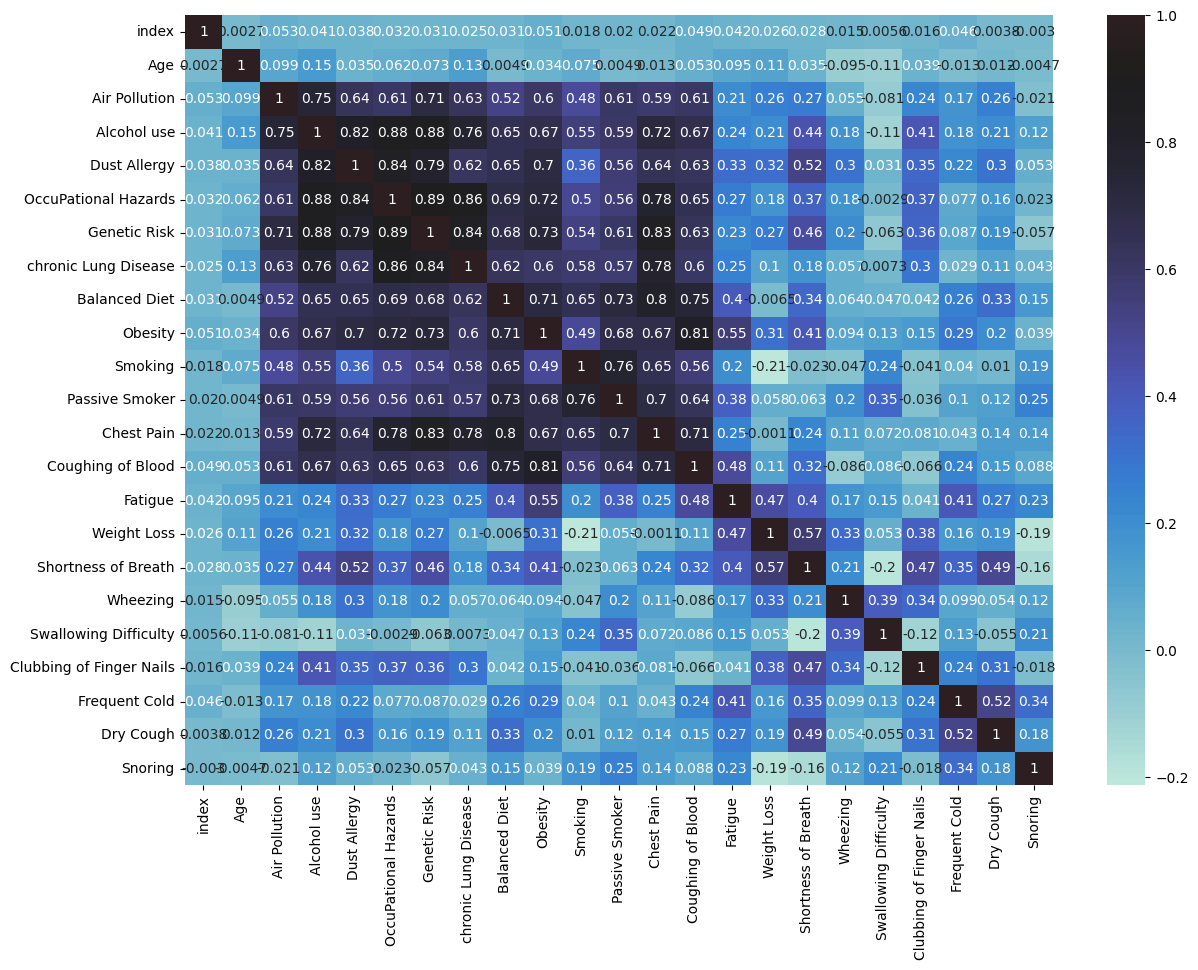

In [8]:
%matplotlib inline
plt.figure(figsize=(14,10))

sns.heatmap(lungCr_df.corr(), annot=True, center=0.9)
plt.show()


In [9]:
# Class Encoding
y = lungCr_df["Level"]
y

0         Low
1      Medium
2        High
3        High
4        High
        ...  
995      High
996      High
997      High
998      High
999      High
Name: Level, Length: 1000, dtype: object

In [40]:
y_enc = pd.get_dummies(lungCr_df["Level"])
y_enc

,High,Low,Medium
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
995,1,0,0
996,1,0,0
997,1,0,0
998,1,0,0


In [10]:
lungCr_df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

## Feature Selection ##

Klasifikasi dengan sebagian Feature yang memiliki Korelasi Tinggi

In [11]:
# Pertahankan kolom 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood'
# Hapus sisanya

X = lungCr_df.drop(['index', 'Patient Id', 'Age', 'Gender', 'Fatigue','Weight Loss', 'Shortness of Breath', 'Wheezing','Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'], axis=1)
X

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood
0,2,4,5,4,3,2,2,4,3,2,2,4
1,3,1,5,3,4,2,2,2,2,4,2,3
2,4,5,6,5,5,4,6,7,2,3,4,8
3,7,7,7,7,6,7,7,7,7,7,7,8
4,6,8,7,7,7,6,7,7,8,7,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,7,7,7,7,6,7,7,7,8,7,7
996,6,8,7,7,7,6,7,7,7,8,7,7
997,4,5,6,5,5,4,6,7,2,3,4,8
998,6,8,7,7,7,6,7,7,8,7,7,9


## Build Train and Test Dataset ##

In [42]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 382 to 37
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Air Pollution         800 non-null    int64
 1   Alcohol use           800 non-null    int64
 2   Dust Allergy          800 non-null    int64
 3   OccuPational Hazards  800 non-null    int64
 4   Genetic Risk          800 non-null    int64
 5   chronic Lung Disease  800 non-null    int64
 6   Balanced Diet         800 non-null    int64
 7   Obesity               800 non-null    int64
 8   Smoking               800 non-null    int64
 9   Passive Smoker        800 non-null    int64
 10  Chest Pain            800 non-null    int64
 11  Coughing of Blood     800 non-null    int64
dtypes: int64(12)
memory usage: 81.2 KB


In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 507 to 207
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Air Pollution         200 non-null    int64
 1   Alcohol use           200 non-null    int64
 2   Dust Allergy          200 non-null    int64
 3   OccuPational Hazards  200 non-null    int64
 4   Genetic Risk          200 non-null    int64
 5   chronic Lung Disease  200 non-null    int64
 6   Balanced Diet         200 non-null    int64
 7   Obesity               200 non-null    int64
 8   Smoking               200 non-null    int64
 9   Passive Smoker        200 non-null    int64
 10  Chest Pain            200 non-null    int64
 11  Coughing of Blood     200 non-null    int64
dtypes: int64(12)
memory usage: 20.3 KB


In [44]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 800 entries, 382 to 37
Series name: Level
Non-Null Count  Dtype 
--------------  ----- 
800 non-null    object
dtypes: object(1)
memory usage: 12.5+ KB


In [45]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 200 entries, 507 to 207
Series name: Level
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


## MLP Classification ##

Klasifikasi berdasarkan nilai korelasi Feature yang tinggi

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer

model = MLPClassifier(random_state=5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        76
         Low       1.00      1.00      1.00        62
      Medium       1.00      1.00      1.00        62

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Tune MLP ##

In [75]:
from pandas.io.parsers.readers import warnings

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=1)

warnings.filterwarnings("ignore")

cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

param = {
    'hidden_layer_sizes':[5, 7, 10],
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam'],
    'learning_rate':['constant','invscaling','adaptive']}

#gridSearch = GridSearchCV(MLPClassifier(), param_grid=param, cv=cv, scoring=['recall','f1'], refit='f1', verbose=3)
gridSearch = GridSearchCV(MLPClassifier(), param_grid=param, cv=cv, scoring='accuracy', refit='f1', verbose=3)

gridSearch.fit(X_train, y_train)

print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 108 candidates, totalling 108 fits
[CV 1/1] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=lbfgs;, score=0.794 total time=   0.1s
[CV 1/1] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=sgd;, score=0.662 total time=   0.2s
[CV 1/1] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=adam;, score=0.419 total time=   0.2s
[CV 1/1] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=lbfgs;, score=0.794 total time=   0.1s
[CV 1/1] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=sgd;, score=0.119 total time=   0.2s
[CV 1/1] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=adam;, score=0.656 total time=   0.2s
[CV 1/1] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, solver=lbfgs;, score=0.794 total time=   0.1s
[CV 1/1] END activation=identity, hidden_layer_sizes=5,